# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


# Sales Analysis for Pens and Printers

### About Pens and Printers
Pens and Printers was founded in 1984 and provides high quality office products to large organizations.

### Business Problem
Six weeks ago we launched a new line of office stationery and since then,
our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two. We nee to know which of this method is the most efficient for us

In [1]:
# importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
sales = pd.read_csv('product_sales.csv')

# reading a sample of the dataframe
sales.sample(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
5313,1,Call,88ab0e46-1a11-4845-8fda-af1c797a4797,7,36.41,5,24,Arkansas
9645,1,Email,6ab0aad7-60a2-47a4-b08f-68bb2aac41a4,9,92.59,0,26,Texas
5055,6,Email + Call,2cb2132a-3606-4b8b-876d-0091ce24846b,15,225.61,3,22,North Carolina
3841,3,Email + Call,3159f228-f8b3-44d7-8324-04f6ea47f7dd,10,154.98,19,25,New Jersey
4943,2,Call,9716bd63-0314-4473-a71a-bdd617afd719,9,43.73,3,21,Illinois
4062,1,Email,9f441cac-ce5c-47b0-b393-396728db1a0e,9,86.55,7,21,California
12098,4,Call,dc6adfd7-6363-45b5-ba1f-de8582c7d806,10,50.84,11,24,New York
3755,6,Call,1aa69cb8-67b5-40a2-a16b-0b471b06a79d,13,65.87,3,28,Virginia
9449,3,Call,8ad8f61f-c3cb-4ec4-988a-fba0ed8d35ae,8,39.24,2,20,Florida
187,2,Email,e0ef62dc-3fb3-4dab-8728-ebc46d9bcf7b,10,100.96,10,25,New York


## Data Wrangling

In [3]:
# checking the unique values in the sales_method column
sales.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

em + call, email needs to be changed to match other records

In [4]:
# number of rows and columns
sales.shape

(15000, 8)

In [5]:
# column datatype and names
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


All column data-types correlates with the nature of data in them. Sales method would be changed to categorical type during the data cleaning 

In [6]:
#statistical info 
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


The years_as_customer column contain a max value of 63. This is an outlier as the company was founded in 1984 and is only 55 years as at 2023

In [7]:
sales[sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


The row would be dropped during the data cleaning stage 

In [8]:
# number of null values in each column
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

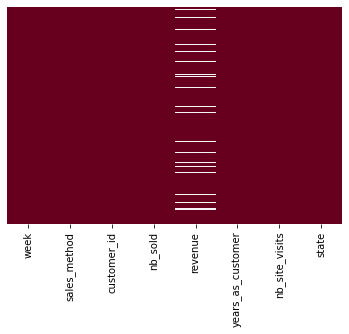

In [9]:
# visualizing the null values
sns.heatmap(sales.isnull(), yticklabels=False, cbar=False, cmap='PuRd_r');

The missing columns are Missing Completely at Random(MCAR). I would fill them with the mean of the revenue

In [10]:
# checking for duplicates
sales[sales.duplicated()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [11]:
# checking for duplicates in the customer_id column
sales[sales.duplicated(['customer_id'])]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


## Data Cleaning

- ### sales_method column

In [12]:
# replacing non-correlating values
sales['sales_method'].replace({'em + call':'Email + Call', 'email':'Email'}, inplace=True)

# confirming replacement
sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [13]:
# change datatype of sales_method
sales['sales_method'] = sales['sales_method'].astype('category')

#confirming the datatype change
sales['sales_method'].dtypes

CategoricalDtype(categories=['Call', 'Email', 'Email + Call'], ordered=False)

- ### removing the outlier in the 'years_as_customer' column

In [14]:
# dropping the row
sales.drop(sales[sales['years_as_customer'] > 39].index, axis=0, inplace=True)

# checking for changes
sales[sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


- ### filling in the missing values with the mean value

In [15]:
# filling out the columns
sales['revenue'].fillna(sales['revenue'].mean(), inplace=True)

# checking for changes
sales['revenue'].isna().sum()

0

## Data Analysis and Visualization

- What is the highest number of new products sold?

In [16]:
# highest number of new products sold
sales['nb_sold'].max()

16

- What is the highest revenue from sales?

In [17]:
# highest revenue from sales
sales['revenue'].max()

238.32

In [18]:
sales[sales['revenue'] == 238.32]


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
3490,6,Email + Call,21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36,North Carolina


- What is the oldest customer number of years buying from the company?

In [19]:
sales['years_as_customer'].max()

39

In [20]:
# initializing Seaborn
sns.set_style('darkgrid')
plt_color = 'black'

In [21]:
# function to plot horizontal count graphs
def Countplty(y, title, xlabel, ylabel):
    '''
    This function creates a countplot of the given categorical data using the Seaborn library.

    Params:
        y (pandas Series or list): A pandas series or list containing categorical data to be plotted.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis of the plot.
        ylabel (str): The label for the y-axis of the plot.
    
    Returns:
        A countplot of the given categorical data.
    '''
    #arrange the bars in order of frequency
    count_a = y.value_counts()[:10]
    count_b = y.value_counts(normalize = True)[:10]*100

    #plot the count graph
    ax = sns.countplot(y = y, order = count_a.index, color = plt_color)

    #create the labels
    label = [f' {p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax.bar_label(container=ax.containers[0], labels=label)
    
    #graph labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks([])

- What is the frequency of sales method?

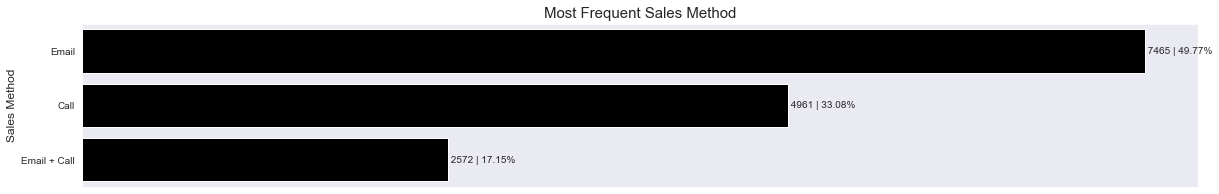

In [22]:
#set plot size
plt.figure(figsize=[20,3])

# plot for sales method
Countplty(sales['sales_method'], 'Most Frequent Sales Method', '', 'Sales Method')

The most frequent sales method is the use of Email, followed by call and email+call 

- Where do customers come from the most?

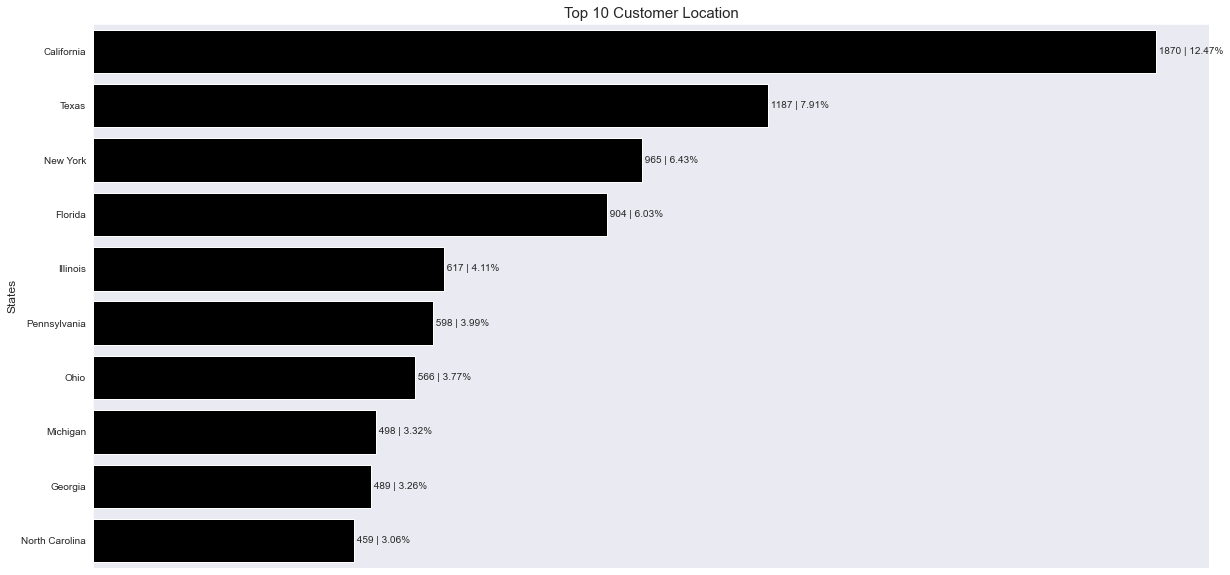

In [23]:
#set plot size
plt.figure(figsize=[20,10])

# plot for sales method
Countplty(sales['state'], 'Top 10 Customer Location', '', 'States')

Most customers came from California, Texas, New York and Florida 

- Which week has the highest records?

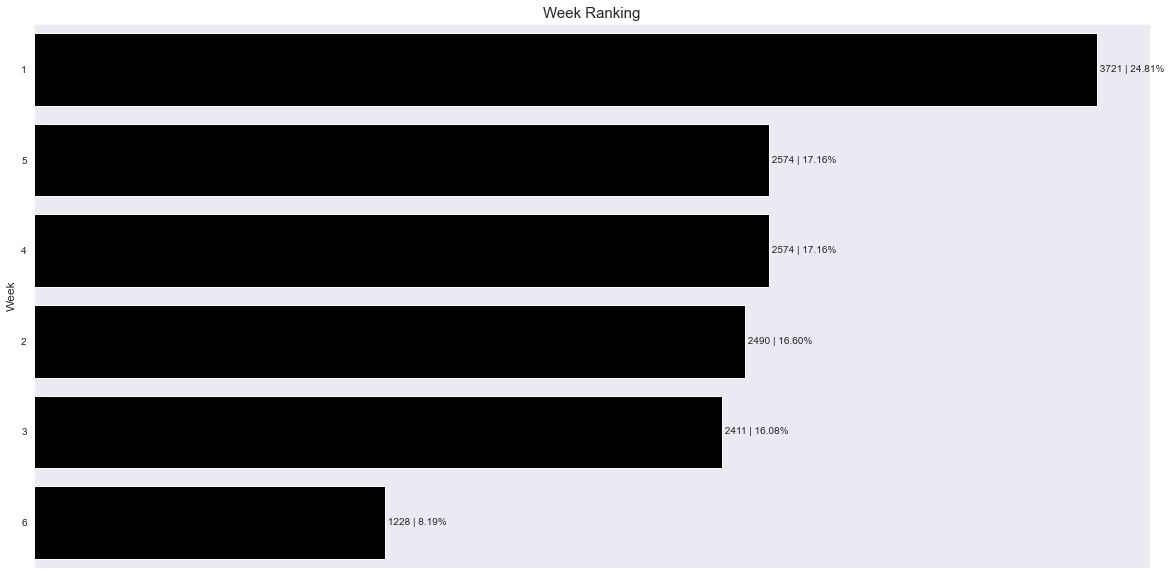

In [24]:
#set plot size
plt.figure(figsize=[20,10])

# plot for sales method
Countplty(sales['week'], 'Week Ranking', '', 'Week')

Week 1 had the highest occurrence followed by week 4, 5, 2, 3 and 6. This doesn't prove the most sales or revenue

In [25]:
#function to plot histograms
def Histplt(x, title, xlabel, ylabel, lln, bn):
    '''
    This function plots a histogram.

    Params:
        x: A pandas Series or array-like object containing the data to be plotted.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis of the plot.
        ylabel (str): The label for the y-axis of the plot.
        lln (float or int): The lower limit of the first bin of the histogram.
        bn (float or int): The bin width of the histogram.

    Returns:
        A histogram plot of the given data.
    '''
    
    plt.figure(figsize=[10,10])
    
    #defining bins
    bins = np.arange(lln, x.max()+bn, bn)
    
    #plot the histogram
    plt.hist(x, bins = bins, color=plt_color)

    #display graph labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

- What is the distribution of number of new products sold?

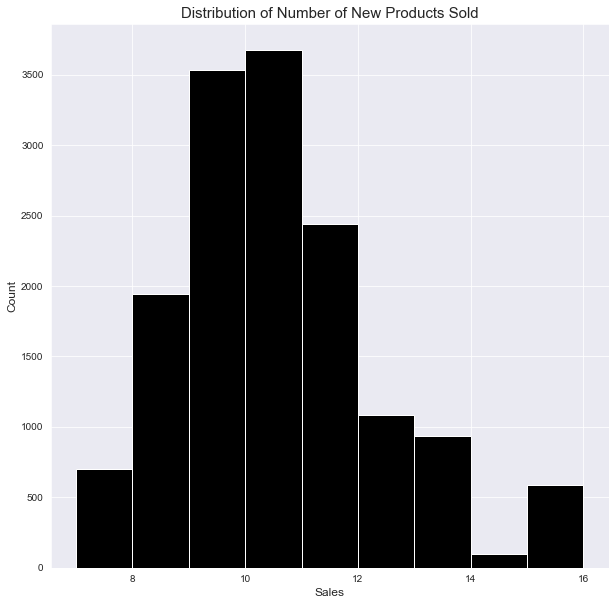

In [26]:
# plot histogram
Histplt(sales['nb_sold'], 'Distribution of Number of New Products Sold', 'Sales', 'Count', 7, 1)

The Sales have a somewhat normal distribution. with a drop between 14 and 14

- What is the distribution of the Revenue?

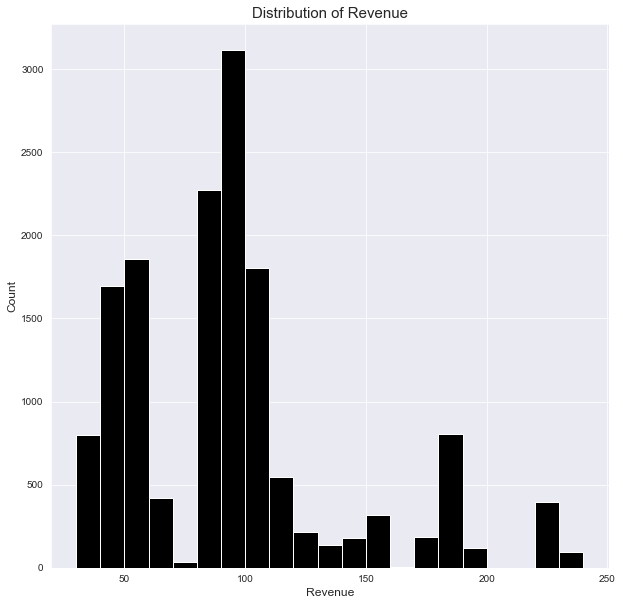

In [27]:
# plot histogram
Histplt(sales['revenue'], 'Distribution of Revenue', 'Revenue', 'Count', 30, 10)

The Revenue rises around 50 but then drops around 70 and peaks at 80. The distribution seem to be a multi-modal distribution

- what is the distribution of the number of years as customer?

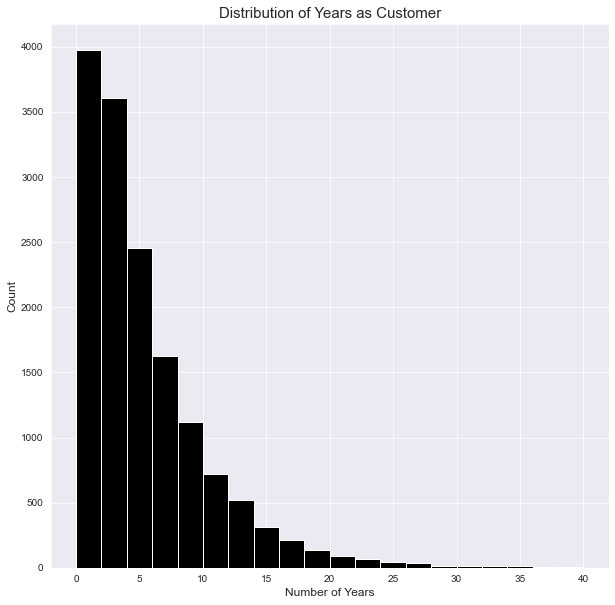

In [28]:
# plot histogram
Histplt(sales['years_as_customer'], 'Distribution of Years as Customer', 'Number of Years', 'Count', 0, 2)

The distribution is a right skewed distribution with frequency reducing as the number of years increases

- What is the distribution of the number of visits to the company's site?

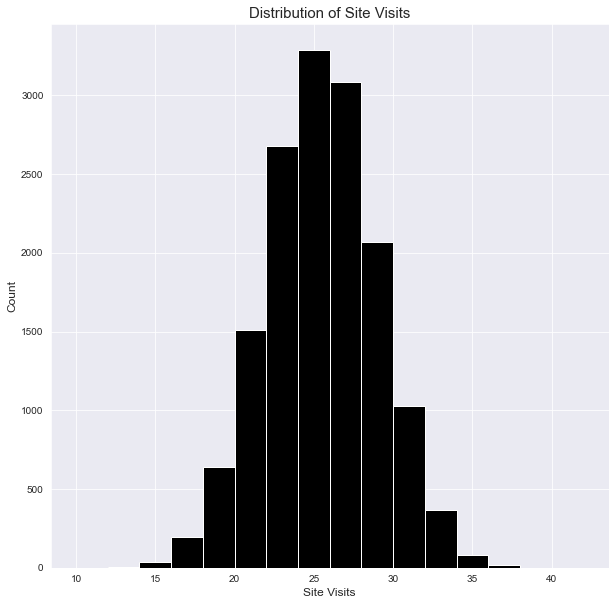

In [29]:
# plot histogram
Histplt(sales['nb_site_visits'], 'Distribution of Site Visits', 'Site Visits', 'Count', 10, 2)

The number of visits to the company's site in the past 6 months is a normal distribution with a mean and median of 25

In [30]:
#function to plot boxplots
def Boxplt(x, y, title, xlabel, ylabel):
    '''
    This function plots a box plot given two data sets.
    
    Params:
        x (pandas Series or array-like): Data to be plotted on the x-axis.
        y (pandas Series or array-like): Data to be plotted on the y-axis.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis of the plot.
        ylabel (str): Label for the y-axis of the plot.
    
    Returns:
        A box plot.
    '''
    
    plt.figure(figsize=[10,10])
   
    #plot the histogram
    sns.boxplot(x=x, y=y, color='#424242');

    #display graph labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

- Does the  Revenue get affected by the week?

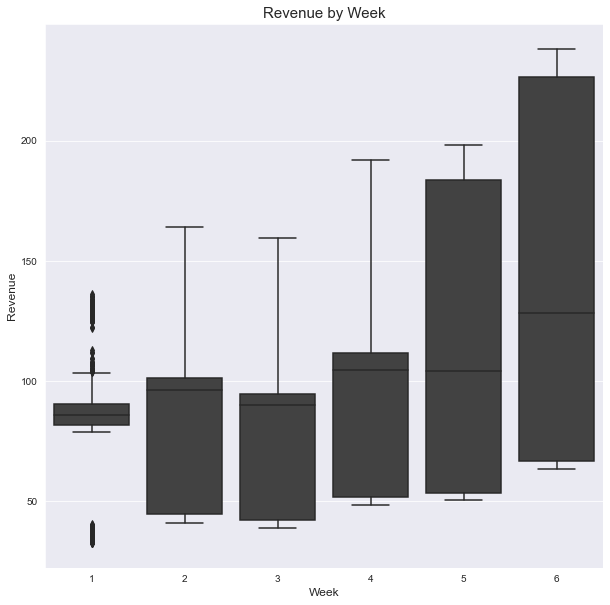

In [31]:
# plot boxplot
Boxplt(sales['week'], sales['revenue'], 'Revenue by Week', 'Week', 'Revenue')

Week 1 had quiet a few outliers. However, it had the lowest range of numbers and lowest median. The range of numbers increases as the weeks go by. Week 6 has the highest range but also has the highest median and highest revenue. This chart explains that Revenue increases as the weeks increases. More customers buy a product 4-6 weeks after it has been released.  

- Does the  number of sales get affected by sales method?

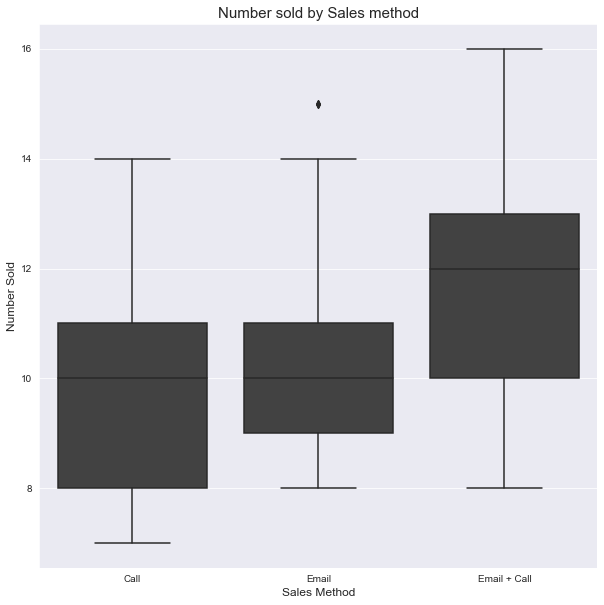

In [32]:
# plot boxplot
Boxplt(sales['sales_method'], sales['nb_sold'], 'Number sold by Sales method', 'Sales Method', 'Number Sold')

From the above chart, Call and Email sales method have the same median at 10 although call has a higher range of numbers. Email + Call had a higher median. This shows that the combination of email and call method of sale sold more new products despite the Email + Call having the lowest frequency. 

In [33]:
sales[sales['nb_sold'] > 15]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
213,6,Email + Call,00dc7276-7b92-4642-9d24-69c841286964,16,232.860000,1,33,Michigan
575,6,Email + Call,a0b8123a-0f92-4152-8ea0-cc732e452f49,16,234.030000,6,29,California
735,6,Email + Call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.190000,2,29,California
1288,6,Email + Call,a42b682d-573a-4301-82b1-42caa5dccc46,16,232.730000,4,30,Georgia
1426,6,Email + Call,fce8075a-23bc-45ff-b537-793a2ddd99c0,16,234.080000,0,30,New York
1684,6,Email + Call,c1c73fb9-cf35-47e2-94d0-eec90bcada4d,16,233.800000,0,30,Florida
1743,6,Email + Call,7fc56abe-dbf1-418a-988c-08e33ebe30bd,16,233.390000,1,32,Oregon
1760,6,Email + Call,4aba322a-0532-4925-b7ae-c51d9dc359ef,16,232.890000,3,36,Florida
2487,6,Email + Call,5bc155b2-a053-472c-a8e1-9a6caf1f584b,16,232.970000,0,29,California
2661,6,Email + Call,efd9156a-f466-4a5c-9e28-5960fb69b36c,16,233.320000,13,28,Louisiana


From the table and box plot above, it is confirmed that all sales that had above 15 numbers of items sold were gotten through the Email + Call method

- Does the revenue get affected by sales method?

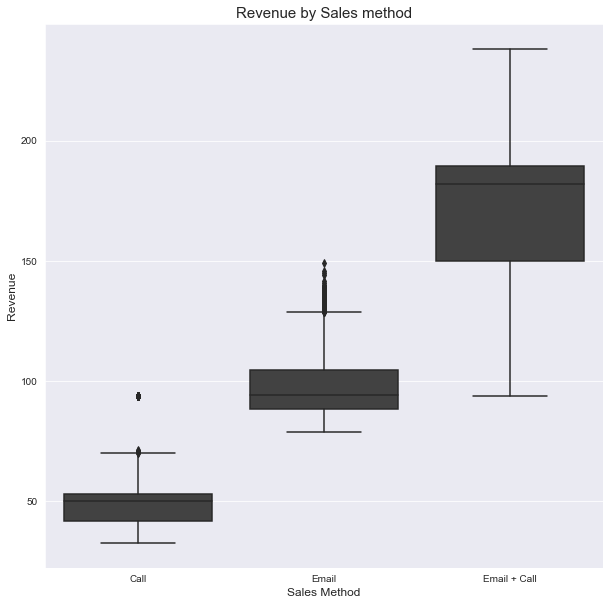

In [34]:
# plot boxplot
Boxplt(sales['sales_method'], sales['revenue'], 'Revenue by Sales method', 'Sales Method', 'Revenue')

In [35]:
sales.groupby('sales_method').mean()['revenue']

sales_method
Call             49.287597
Email            96.895216
Email + Call    171.477835
Name: revenue, dtype: float64

There's a very distinct gap between the sales methods in terms of revenue. Using email and the combination of email and call method would produce a much higher revenue than only call. All revenue gotten above 150 was gotten using the combination of email and call

In [36]:
#function to plot scatterplot
def Scatterplt(x, y, title, xlabel, ylabel, hue=None):
    '''
    This function plots a scatterplot.
    
    Params:
        x (pandas Series or array-like): A pandas Series or array-like object containing the data to be plotted on the x-axis.
        y (pandas Series or array-like): A pandas Series or array-like object containing the data to be plotted on the y-axis.
        title (str): A string to be used as the title of the plot.
        xlabel (str): A string to be used as the label for the x-axis of the plot.
        ylabel (str): A string to be used as the label for the y-axis of the plot.
        hue (optional): A string or pandas Series containing categorical data. If provided, the plot will use different colors for
                        each unique value of hue.
    Returns:
        A scatterplot.
    '''
    
    plt.figure(figsize=[10,10])
   
    #plot the histogram
    sns.scatterplot(x=x, y=y, color=plt_color, hue=hue, palette='rocket_r');

    #display graph labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

- Does number of years as a customer and the week the sales was made have an effect on number of products sold?

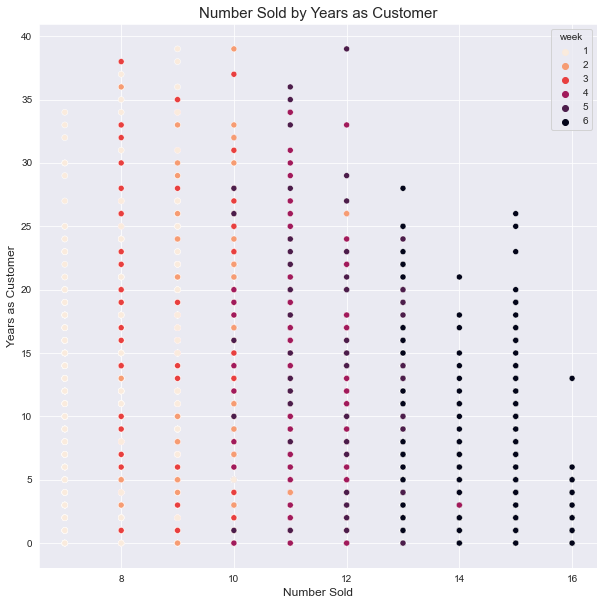

In [37]:
# plot scatterplot
Scatterplt(sales['nb_sold'], sales['years_as_customer'], 'Number Sold by Years as Customer', 'Number Sold', 'Years as Customer', hue=sales['week']);

There is a slight correlation between the number of items sold and the week the sales were made. There's also a slight negative correlation between the years as customer and the number of items sold. The highest number sold has lower number of years as customer and is majorly from 6 weeks old product.

- Does number the week the sales was made and the sales method have an effect on number of products sold?

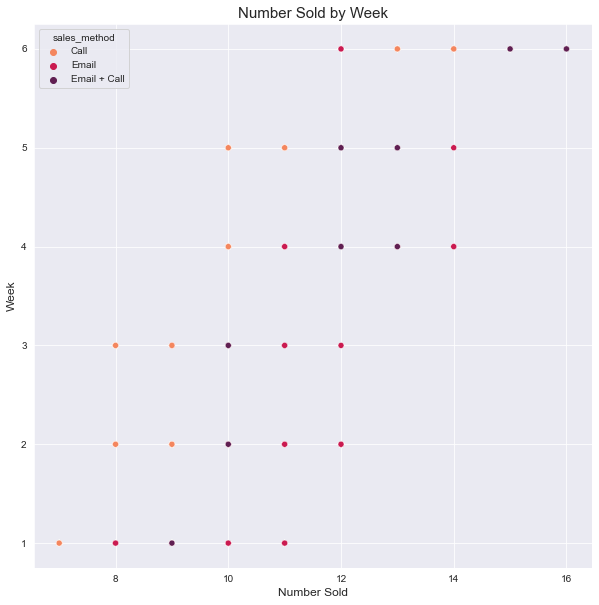

In [38]:
# plot scatterplot
Scatterplt(sales['nb_sold'], sales['week'], 'Number Sold by Week', 'Number Sold', 'Week', hue=sales['sales_method']);

This serves as a confirmation of the correlation between the number of items sold and the week the sales were made and the sales method 

- Does the number of site visits affect the number of items sold?

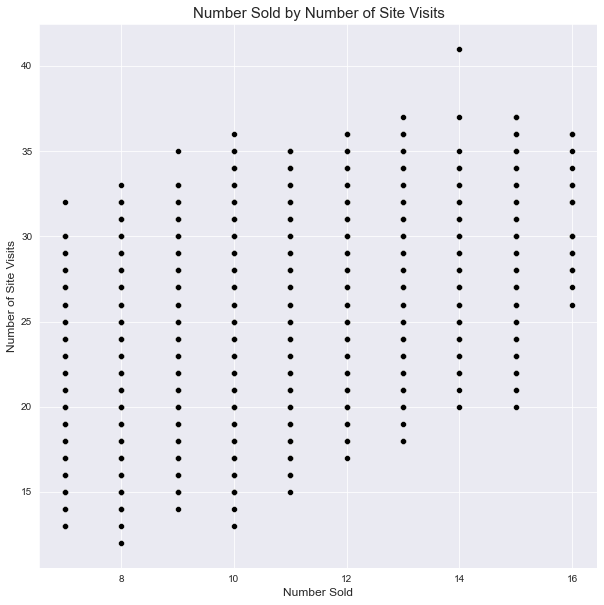

In [39]:
# plot scatterplot
Scatterplt(sales['nb_sold'], sales['nb_site_visits'], 'Number Sold by Number of Site Visits', 'Number Sold', 'Number of Site Visits');

There seems to be a correlation between the number of site visits and the numbers sold. More site visits would likely lead to more sales. 

- Does the number of years as a customer determine the number of site visits?

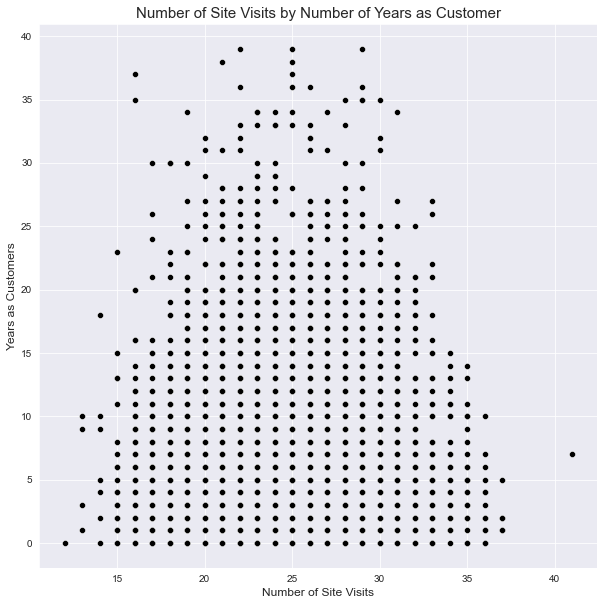

In [40]:
Scatterplt(sales['nb_site_visits'], sales['years_as_customer'], 'Number of Site Visits by Number of Years as Customer', 'Number of Site Visits', 'Years as Customers');

There seems to be no correlation between the number of site visits and the number of years as a customer. The pattern is rather random. 

- Does the number sold and week determine the revenue?

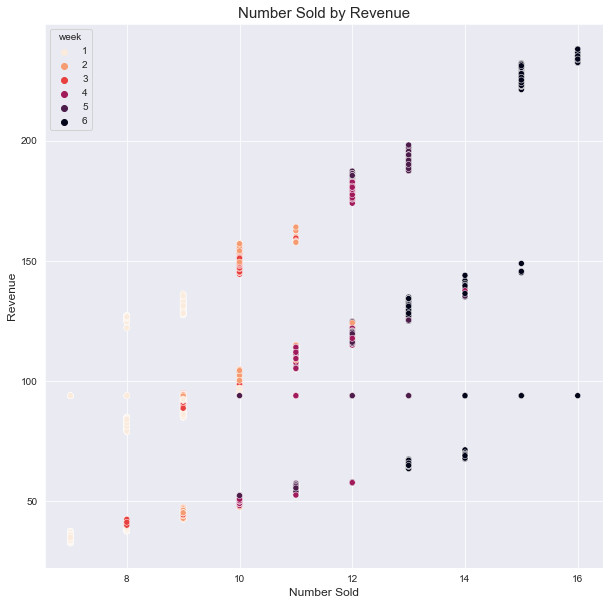

In [41]:
# plot scatterplot
Scatterplt(sales['nb_sold'], sales['revenue'], 'Number Sold by Revenue', 'Number Sold', 'Revenue', hue=sales['week']);

There is a positive correlation between the number sold and the revenue and the week the sales was made.

- Does the years as customer and week determine the revenue?

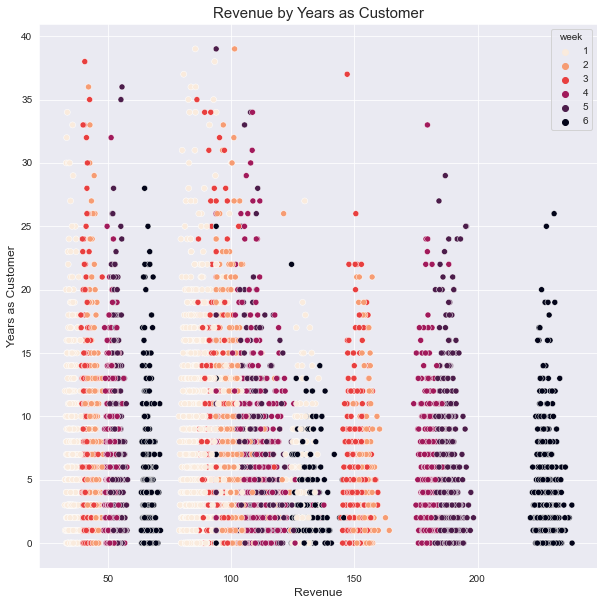

In [42]:
# plot scatterplot
Scatterplt(sales['revenue'], sales['years_as_customer'], 'Revenue by Years as Customer', 'Revenue', 'Years as Customer', hue=sales['week'])

There is a pattern between the revenue and week the sales was made. This is in correlation with the box plot from earlier. Earlier weeks do not have higher revenue. This confirms that higher revenue is made from sales of later weeks

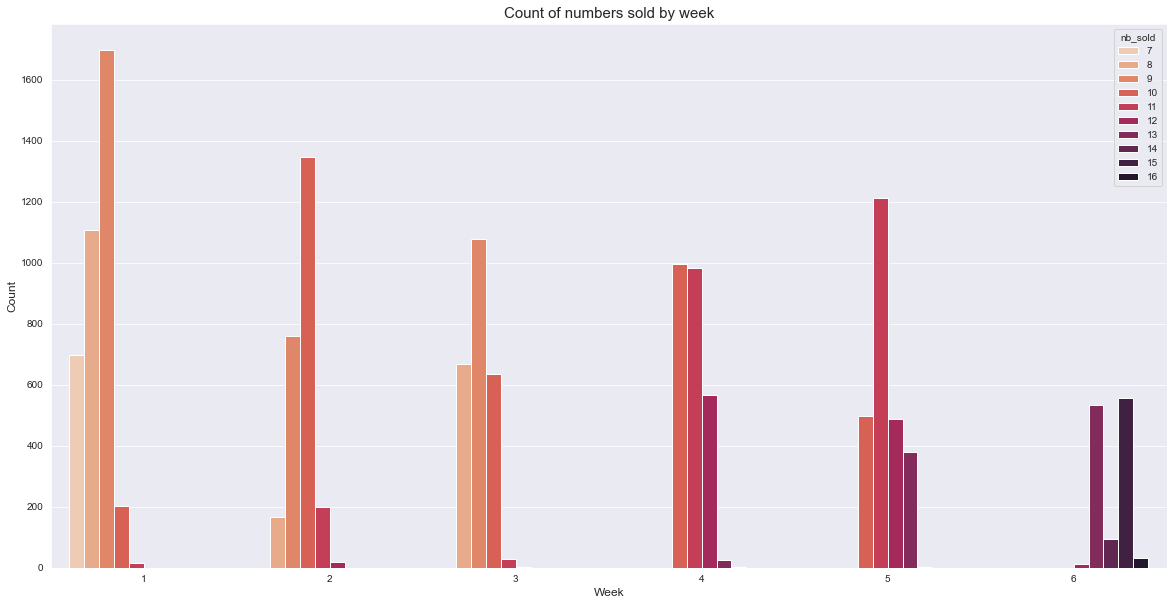

In [43]:
# plot countplot
plt.figure(figsize=[20,10])
sns.countplot(data=sales, x='week', hue='nb_sold', palette='rocket_r')

#display graph labels
plt.title("Count of numbers sold by week", fontsize=15)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Count', fontsize=12);

The above plots combined together tells an interesting story that even though the count of the number sold in the earlier weeks are higher, the numbers sold is lesser than the later weeks and the count of the number sold in the later weeks is lesser but the numbers sold is higher. This is what causes the revenue to be more in later weeks than earlier weeks

In [44]:
#creating a function to plot heatmap in pairs
def Heatmapplt(x, y, z, title, xlabel, ylabel, annot = False): 
    '''
    This function plots a heatmap to visualize the relationship between two categorical variables and a numerical variable.
    
    Parameters:
        x (str): The column name of the x-axis in the heatmap.
        y (str): The column name of the y-axis in the heatmap.
        z (str): The column name of the values to be plotted in the heatmap.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis of the plot.
        ylabel (str): The label for the y-axis of the plot.
        annot (bool, optional): Whether or not to annotate the heatmap with the data values. Default is False.
    
    Returns:
        A heatmap plot.
    '''
    
    #group the data according to z column's mean using the x and y column
    plot_df = sales.groupby([x, y])[z].agg(np.mean)

    #reset index and create a pivot table
    plot_df = plot_df.reset_index().pivot(index=x, columns=y, values=z)

    #plot the heatmap
    sns.heatmap(plot_df, annot=annot, fmt ='.2f', cmap = 'rocket_r')

    #display graph labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

- How is revenue affected as the weeks progresses considering the sales method?

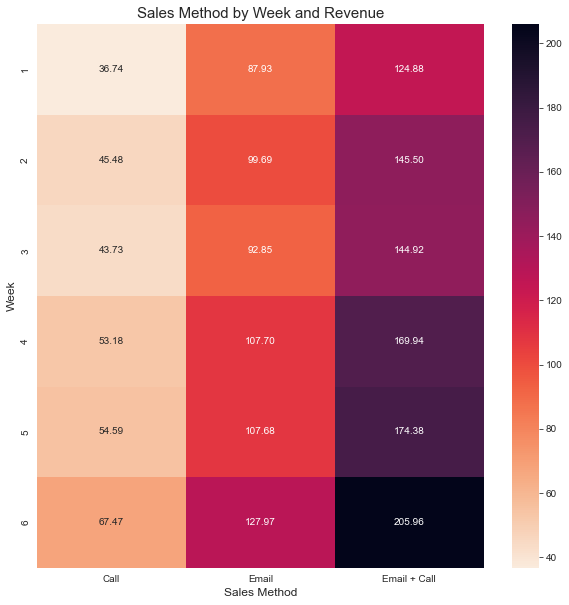

In [45]:
# plot heatmapplot
plt.figure(figsize=[10,10])
Heatmapplt('week','sales_method', 'revenue', 'Sales Method by Week and Revenue', 'Sales Method', 'Week', True)

Email + Call had the highest revenue across the weeks. This performance is followed by Email and then the Call sales method

- How does the years as customers affect numbers sold and revenue

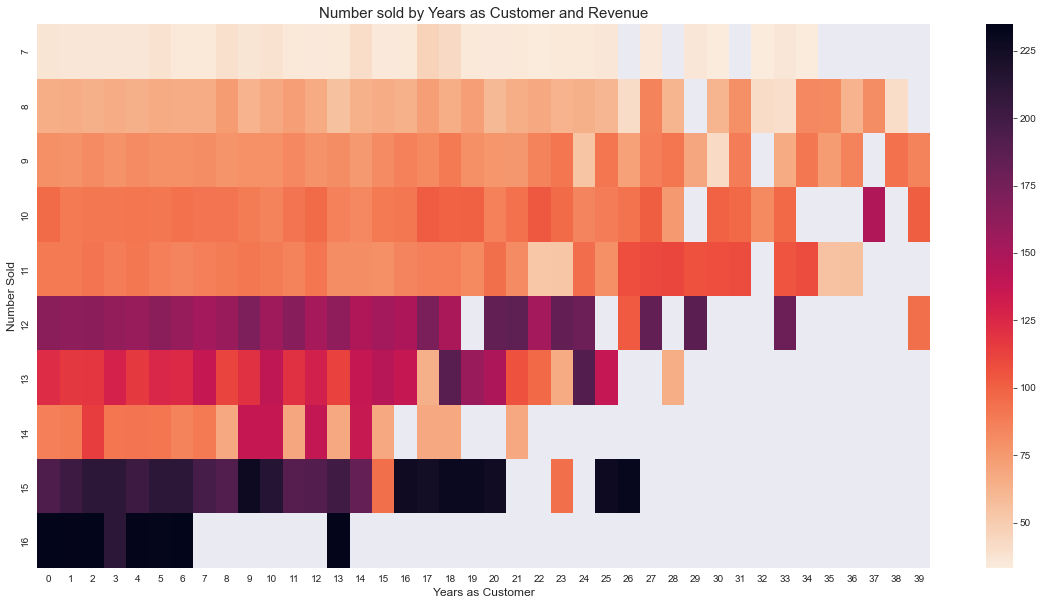

In [46]:
# plot heatmapplot
plt.figure(figsize=[20,10])
Heatmapplt('nb_sold','years_as_customer', 'revenue', 'Number sold by Years as Customer and Revenue', 'Years as Customer', 'Number Sold')

From this chart we can see that customers that buy more and generate more revenue are new customers. Older customers tend to buy less. This can also be due to the fact that there are fewer customers that are over 20 years as customers.  

- What is the relationship between all the numberic values?   

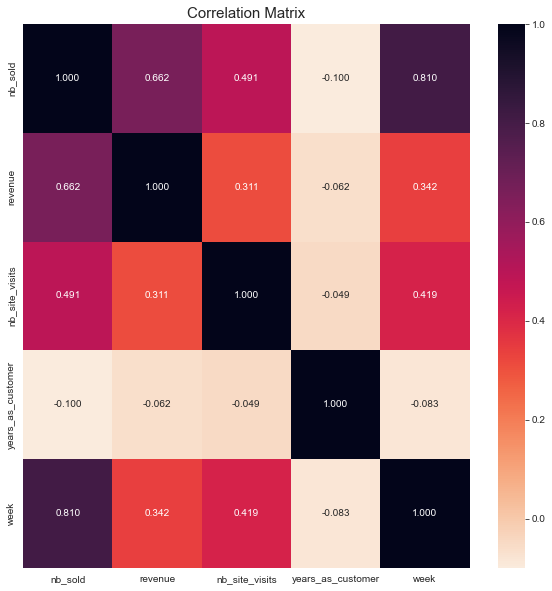

In [47]:
#define the variables to be used
vars=sales[['nb_sold', 'revenue', 'nb_site_visits', 'years_as_customer', 'week']]

#set figure size
plt.figure(figsize=[10,10])

#plot heatmap
sns.heatmap(vars.corr(), annot = True, fmt = '.3f', cmap='rocket_r');

#display graph labels
plt.title('Correlation Matrix', fontsize=15);

There is a strong correlation between numbers sold and week , numbers sold and revenue, numbers sold and number of site visites. The correlation between the numbers sold and number of site visits is not as strong as the others 

---

## Business Solution
#### Definition of a metric for the business to monitor 

The best metric for the business to monitor in this situation and with the data given is a productivity index which is equals to``` The Revenue generated from sales method divided by (/) time spent on the sales method```. Tracking sales revenue can provide insights into the effectiveness of marketing and sales strategies, as well as how well products are performing in the market. Tracking the time can provide insights into which method is the most productive with the least amount of time. 

#### How should the business use the metric to monitor the business problem?
The comparison between the Sales method and revenue gotten would tell a clear story on which sales method would be the best to use considering the time put into the execution of each method.

#### Can you estimate initial value(s) for the metric based on the current data?
Based on the current data, The average revenue from Call is 49.28, Email is 96.89 and Email + Call is 171.47. Given that Call takes 30 minutes and the call in the Email + Call method takes 10 minutes and assuming that sending each email takes 5 minutes 

| Sales Method 	| Average Revenue 	| Time Taken    	| Productivity Index 	|
|--------------	|-----------------	|---------------	|--------------------	|
| Call         	| 49.28           	| 30            	| 1.64               	|
| Email        	| 96.89           	| 10 (2 emails) 	| 9.68               	|
| Email + Call 	| 171.47          	| 15            	| 11.43               	|


The most productive method is the Email + Call method. Considering the Average Revenue generated and the amount of effort put into by the sales team


---

## Summary of findings
- The highest number of new products sold at a time is 16 and the highest revenue gotten from products sold to a customer is 238.32 with 16 items bought 
- The top five location of the customers are California, Texas, New York, Florida, and Illinois
- The combination of email and call method of sale sold more new products and created more revenue despite the combination being the least used.
- Week 1 has a higher count of customers followed by week 4, 5, 2, 3 and 6. However, this doesn't determine much as the revenue increases as the weeks since product launch goes by making week 6 have the highest revenue. This pattern is also seen with the number of items sold. More items are sold in the later weeks.
- Years as a customer does not determine the number of site visits
- Customers that buy more and generate more revenue are new customers. Older customers tend to buy less and this can also be due to the fact that there are fewer customers that have over 20 years as customers.  


---

## Conclusion and Recommendations
- Considering that the combination of Email and Call produces the most revenue and is the most productive according to the defined metric, Pens and Printers should intensify their efforts in the sales method of Email and Call
- Since the most sales and revenue from products are gotten 4-6 weeks after the lunch of the product, this would indicate that the products are bought after the second reminder which could be the email or call. Pens and Printers should make an effort to remind customers earlier
- As older customers tend to buy less, there should be some sort of incentive or promo run to reinitiate the interest of older customers

In [48]:
jupyter nbconvert --to slides --no-input notebook_slides_2.ipynb

SyntaxError: invalid syntax (3617002697.py, line 1)